<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

In [13]:
import numpy as np
from matplotlib import pyplot as plt

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [12]:
#How do we obtain numbers from a Normal Distribution?

np.random.normal(loc = 5,scale = 2,size = 10)

#loc = mean (line of symmetry)
#scale = sd
#size = number of numbers

#Take note also that 68% of the points like within a sigma from the mew. So, by increasing/decreasing sigma,
# we can 'control' the points we get

array([3.29561591, 3.60979433, 2.92516047, 6.398337  , 6.04809539,
       5.64726605, 7.66614151, 2.2172431 , 3.96327779, 2.11663241])

### 1.2 Visualising the random numbers

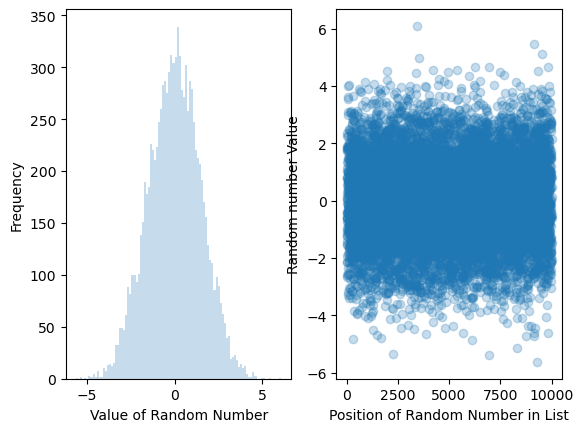

In [23]:
#It can be tricky to visualize random numbers, hence we make use of plots!

x = np.random.normal(loc = 0,scale = 1.5, size = 10000)

fig, ax = plt.subplots(nrows = 1, ncols = 2)

ax[0].hist(x,bins = 100, alpha = .25)
ax[0].set_xlabel("Value of Random Number")
ax[0].set_ylabel("Frequency")

ax[1].scatter(range(10000),x,alpha =.25)
ax[1].set_xlabel("Position of Random Number in List")
ax[1].set_ylabel("Random number Value")

plt.show()


### 1.3 68%?

In [26]:
#Lets check the 68% law we stated earlier

random_numbers = np.random.normal(loc = 0, scale = 2, size = 100)

upper_lim = 2
lower_lim = -2

the_68 = random_numbers[(random_numbers > -2) & (random_numbers < 2)]

outcome = (len(the_68)/len(random_numbers))*100

print(f'{outcome}% of the points lies within mean plus minus standard deviation')


68.0% of the points lies within mean plus minus standard deviation


## 1 Brownian Motion in 1D

### 1.1 The scenario

Let’s simulate a simple random walk in 1D. The scenario is such that a particle is restricted to moving in 1D (i.e. only along a line). It moves in steps, either one unit to the left or one to the right. The choice of left or right is selected randomly. Let’s take the probability of going right as p and porbability of going left as q = 1-p



### 1.2 The simulation

In [40]:
#This is the implementation of the function for 1D random walk


def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if np.random.rand() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

#Now, each time the function runs, it outputs the relative position of the particle w.r.t origin
# Negative output implies to the left and right otherwise


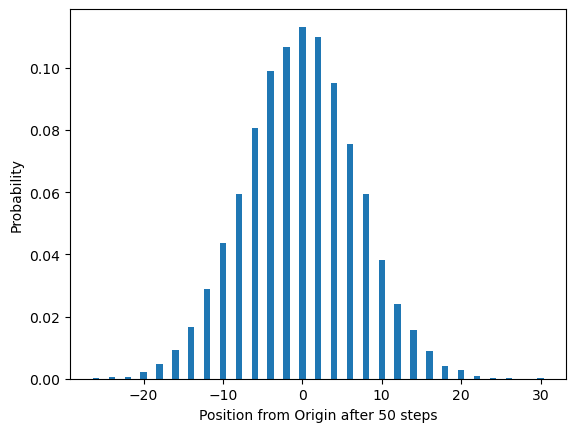

In [68]:
#Similarly now, lets take a look at the distribution of x as we repeat the experiments many times

repetition = 10000
xs = [brown_1d(no_of_steps = 50) for i in range(repetition)]
x_value, x_counts = np.unique(xs,return_counts=True)
probability = x_counts/repetition

plt.bar(x_value, probability)
plt.xlabel('Position from Origin after 50 steps')
plt.ylabel('Probability')
plt.show()



### 1.3 What does theory say?

A theoretical analysis of 1D random walks predicts that the distribution of positions should have a mean of 
N
(
p
−
q
)
 and a standard deviation of 
√
4
N
p
q
 (where 
N
 is the total number of steps). The distribution is actually Binomial, but since we have a large number of steps, it approximates a Gaussian. So, let’s overlay a Normal distribution over our previous plots to see how well our simulation agrees with the theory.


## 2 Estimating \(\pi\)

### 2.1 The method

Consider a circle inscribed on a square surface, as shown above. Let’s take the radius of the circle to be 1. Then, if we throw a large number (
N
t
o
t
a
l
) of grains of sand randomly onto this surface, the number of grains landing on the green, the circular area will be related to the number on the total area by:

N
g
r
e
e
n
/
N
t
o
t
a
l
≈
Area of green region
/
Area of square

### 2.2 A poor but intuitive solution

In [71]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = np.random.uniform(low=-1, high=1, size=1)     
    y = np.random.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi


#The issue with the solution is that it is slow, because we are drawing the random number one by one

3.14736

### 2.3 A better solution

In [75]:
N_total=1_000_000
x=np.random.uniform(low=-1, high=1, size=N_total)
y=np.random.uniform(low=-1, high=1, size=N_total)
N_green= np.sum(np.sqrt(x**2+y**2) <= 1)              # Oh! the ease of NumPy!

4 * (N_green / N_total)

#This is a quicker solution, recall the operations involving numpy arrays

3.141612

### 2.4 A smarter solution

In [77]:
N_total=1_000_000
x=np.random.rand(N_total)
y=np.random.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

#Now, this solution is even more effective because our range for x and y is within 0,1 // instead of -1,1


3.141812

## Exercise 1 :  Vital Stats of Random π

In [179]:
def estimate_pi(n):
    x=np.random.rand(n)
    y=np.random.rand(n)
    N_green=np.sum(np.sqrt(x**2+y**2) <= 1)

    return 4 * (N_green / n)

estimate_pi(10000)

3.1312

In [191]:
repetition = 100
res = [estimate_pi(10000) for i in range(repetition)]
pi_values = np.unique(res)

mean = np.mean(pi_values)
standard_deviation = np.std(pi_values)

print(mean)

print(standard_deviation)

3.1429885714285715
0.017370019679708727


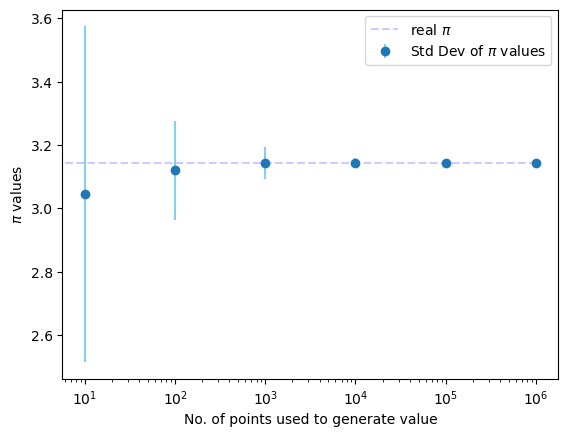

In [192]:
res_1 = [estimate_pi(10) for i in range(repetition)]
res_2 = [estimate_pi(100) for i in range(repetition)]
res_3 = [estimate_pi(1000) for i in range(repetition)]
res_4 = [estimate_pi(10000) for i in range(repetition)]
res_5 = [estimate_pi(100000) for i in range(repetition)]
res_6 = [estimate_pi(1000000) for i in range(repetition)]

numbers = [10,100,1000,10000,100000,1000000]
data = [res_1,res_2,res_3,res_4,res_5,res_6]
mean_data = []
sd_data = []
for i in data:
    mean_data += [np.mean(i)]
    sd_data += [np.std(i)]

plt.xscale('log')    
plt.errorbar(numbers,mean_data, yerr= sd_data,ecolor = 'skyblue',ls = '',fmt = 'o', label = r'Std Dev of $\pi$ values')
plt.hlines(np.pi,0,1000000,ls = 'dashed',color = 'b',alpha =.2,label = r'real $\pi$')
plt.ylabel(r'$\pi$ values')
plt.xlabel('No. of points used to generate value')
plt.legend(loc = 'upper right')
plt.show()